# Задание взято с [платформы](https://karpov.courses/)

## Задачи
- Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. Сколько уникальных значений принимает переменная platform?
 
- Какой клиент совершил больше всего успешных операций? (success == True)
 
- С какой платформы осуществляется наибольшее количество успешных операций?
 
- Какую платформу предпочитают премиумные клиенты?
 
- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
 
- Постройте график распределения числа успешных операций
 
- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
Описание данных
 
**user_data:**
 
*client* – идентификатор пользователя
 
*premium* – является ли клиент премиум
 
*age* – возраст
 
 
**logs:**
 
*client* – идентификатор пользователя
 
*success* – результат (успех - 1, нет - 0)
 
*platform* – платформа
 
*time* – время в формате Unix

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [22]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [21]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Посмотрим на размеры двух датафреймов, типы данных, пропущенные значения и описательную статистику

Размеры

In [9]:
user_data.shape

(2954, 3)

In [11]:
logs.shape

(4500, 4)

Типы данных в датафреймах

In [12]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

Проверим, имеется ли пропущенные значения

In [16]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [17]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

Пропущенных значений нет. Напоследок проверим описательную статистику

In [19]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [20]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [24]:
logs.platform.nunique()

3

In [39]:
logs.query('success == True') \
    .groupby('client') \
    .aggregate({'success': 'count'}) \
    .sort_values(['success', 'client'], ascending=[False, True]) \
    .head(10)

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


In [41]:
logs.query('success == True') \
    .value_counts('platform') 

platform
phone       2019
computer    1090
tablet       180
dtype: int64

In [52]:
user_data.merge(logs, on='client', how='inner') \
         .query('premium == True') \
         .value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


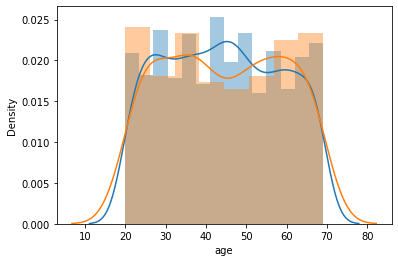

In [61]:
premium_users = user_data.query('premium == True')
usual_users = user_data.query('premium == False')


sns.distplot(usual_users.age)
sns.distplot(premium_users.age)


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


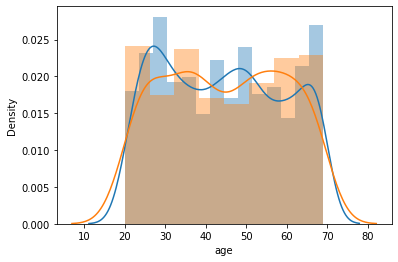

In [64]:
full_data = user_data.merge(logs, on='client', how='inner') 
full_premium = full_data.query('premium == True')
full_usual = full_data.query('premium == False')

sns.distplot(full_usual.age)
sns.distplot(full_premium.age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


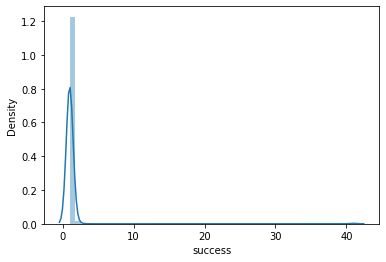

In [75]:
success_logs = logs.query('success == True') \
                   .groupby('client', as_index=False) \
                   .aggregate({'success': 'count'}) \
                    


sns.distplot(success_logs.success)

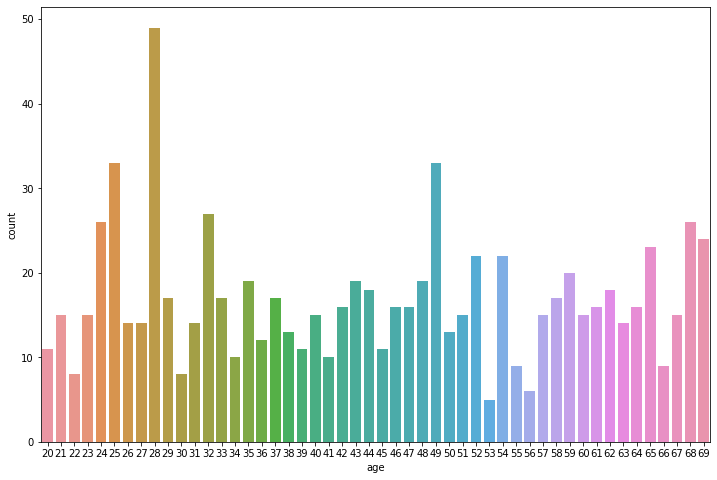

In [83]:

data_computer = full_data.query('(platform == "computer") & (success == True)')

plt.figure(figsize=(12, 8))

sns.countplot(x=data_computer.age)
